In [112]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

In [113]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")

In [114]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [115]:
df1.shape

(13320, 9)

In [116]:
df1.groupby('area_type')['area_type'].agg('count')
#gives me counts of different area types by area type

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [117]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
#could be useful columns. will drop for simplicities sake.

In [118]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [119]:
df2.isnull().sum()
#checking for null values

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [120]:
#I can afford to drop these rows. I could also take medians
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [121]:
df3['size'].unique()
#curious about what type of bedroom values there are

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [122]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
#grabbing the actual integer values of the bedrooms

/var/folders/bt/9szs452n1k1621c2_dzcc2tw0000gp/T/ipykernel_38001/665989940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [123]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [124]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [125]:
df3[df3['bhk']>20]
#looks like an error!!

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [126]:
df3.total_sqft.unique() #checking to see what square feet values I get

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [127]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
#to find the sqft values that are not numbers

In [128]:
df3[~df3['total_sqft'].apply(is_float)].head(10)
#need to take the averages

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [129]:
#take average of range values
#drop other rows (could also do unit conversions)

In [130]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [131]:
df3[~df3['total_sqft'].apply(is_float)].head(10)


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [132]:
convert_sqft_to_num('3000')

3000.0

In [133]:
convert_sqft_to_num('1500 - 2600')

2050.0

In [134]:
convert_sqft_to_num('1500Sq. Meter')

In [135]:
#create a new df for each new col
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(conver_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [136]:
df4.loc[30] # it works! took the average at index 30

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [137]:
df5 = df4.copy()
#let's do some feature engineering
#price is in lakh rupees
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [138]:
df5.location.unique().shape

(1304,)

In [139]:
#if I do one hot encoding, I will have ~too~ many columns
#dimensionality curse :{

In [140]:
#lets strip extra spaces so as to accurately get counts for each location
df5.location = df5.location.apply(lambda x : x.strip())

In [141]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [142]:
#if theres less than 10 data points, we'll label it as "other location"
len(location_stats[location_stats<=10])

1052

In [143]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [144]:
len(df5.location.unique())

1293

In [145]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [146]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [147]:
#now let's do some outlier detection and removal
#lets find where the sqft per bedroom is less than a certain threshold
#typical sqft per bedroom is ~300

In [148]:
#e.g.
600/6 #is an outlier...600 sqft for 6 bedrooms

100.0

In [149]:
df5[df5.total_sqft/df5.bhk<300].head()
#BTW, BHK --> bedroom, hall, kitchen
#for example, 2 BHK is 2 bedrooms, 1 hall, 1 kitchen

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [150]:
df5.shape

(13246, 7)

In [151]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)] #negating to filter out the outlier rows

In [152]:
df6.shape

(12502, 7)

In [153]:
df6.price_per_sqft.describe()
#I wanna see the stats so i can find outliers

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [155]:
#lets remove extreme cases using the standard deviation
#we're assuming this is a normal distribution, so
#~68% of data points should fall within one standard deviation (68-96-99 rule)
#we have to do this PER location

In [164]:
#find mean and standard deviation for EACH location
#remove outliers that are one std above or below the mean
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    #key is the location, subdf is the subdf of the location  (key)
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft >(m-st)) & (subdf.price_per_sqft<=(m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape #removed ~2000 outliers

(10241, 7)

In [ ]:
#now lets see if the property prices for 3 bedroom apmts are different from 2 bedroom apts
#let's VISUALIZE!


In [169]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+',color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Foot")
    plt.title(location)
    plt.legend()

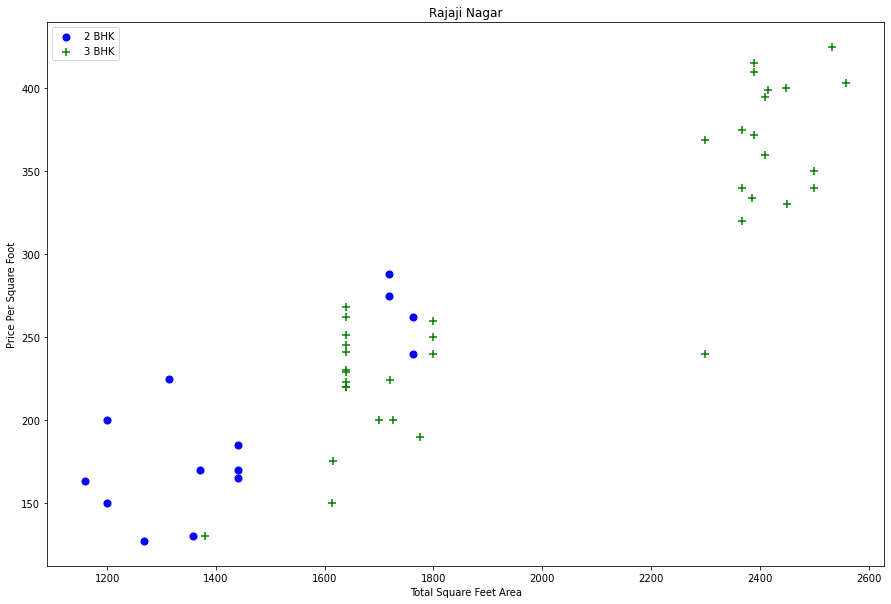

In [171]:
plot_scatter_chart(df7, "Rajaji Nagar")
#in this example, we see four 2 bedroom apmts that are more expensive than 3 bedroom apmts

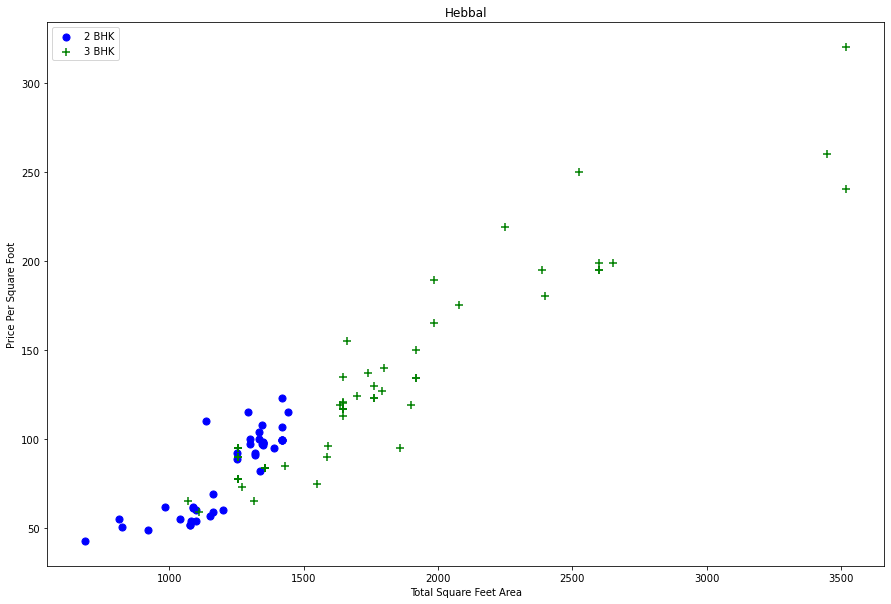

In [172]:
plot_scatter_chart(df7, "Hebbal")


In [173]:
#lets create some stats for bedroom aptms (such as mean for 1 bdrm, 2 bdrm, etc)
#for example, if the price for a 2 bedroom is higher than the mean of a 1 bedroom, we'll remove it

In [180]:
#create location data frames.
#based on those location data frames, make data frames based on BHK values
#compute mean and std for each data frame
#exclude datapoints which have price per sqft values which are less than the mean of the previous BHK
#for example, for 2 bedroom apartments, we'll filter out values which are less than the mean of 1 bdrm apmts
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
            'mean' : np.mean(bhk_df.price_per_sqft),
            'std' : np.std(bhk_df.price_per_sqft),
            'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            #because we dont want to exclude TOO much data, we're only excluding when theres more than 5 apmts which 
            #fall outside the previous bhk's mean 
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

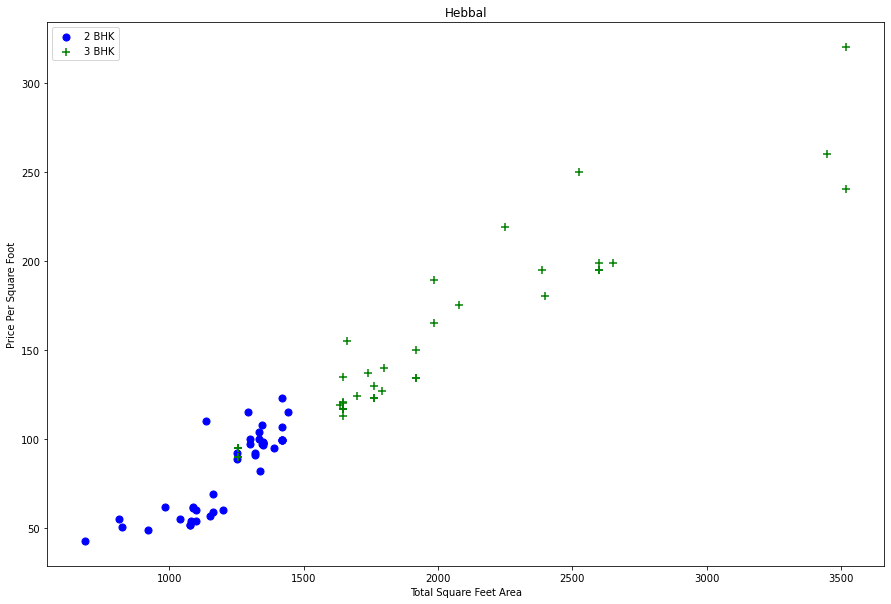

In [181]:
plot_scatter_chart(df8, "Hebbal")
#notice how most outliers were removed

Text(0, 0.5, 'Count')

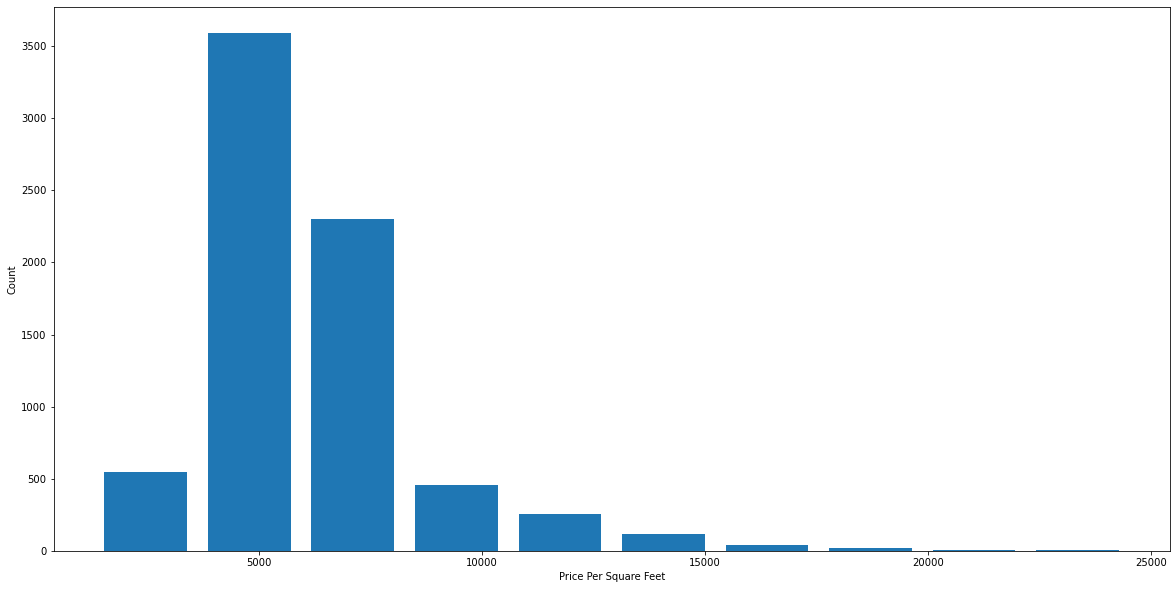

In [183]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
#majority of data points are between 5000-10000 rupees
#notice how it's a relatively normal distribution

In [184]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [185]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

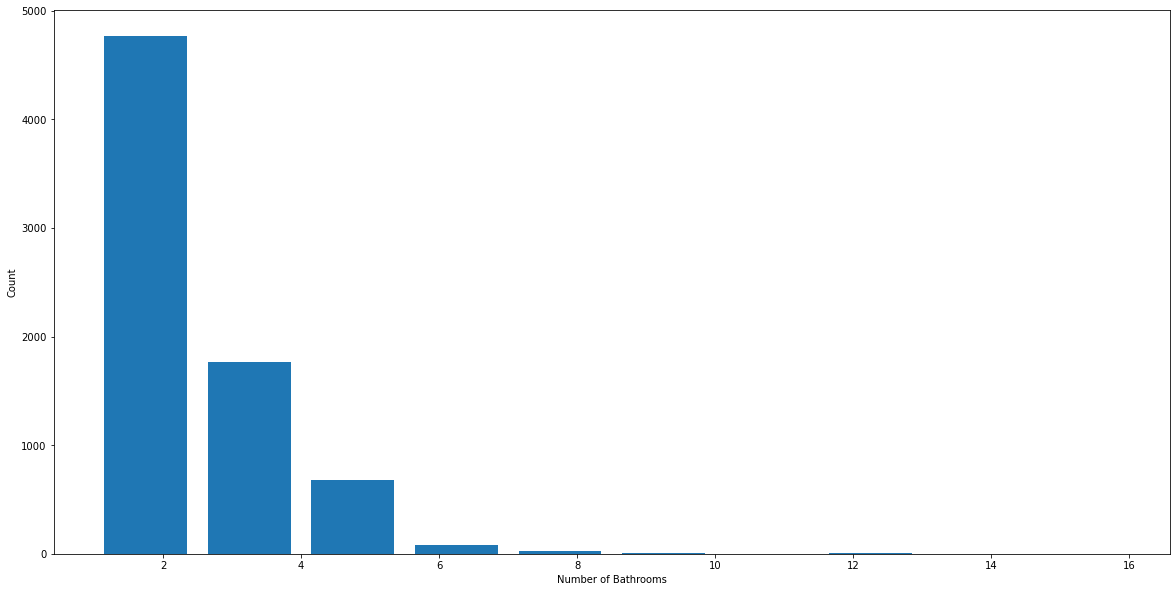

In [186]:
#if there is more bathrooms than (# of bedrooms + 2), let's remove it
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")
#notice how most apmts have 2-4 bathrooms

In [187]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [189]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [ ]:
#we can now drop size because we used size to find BHK column
#we can also drop price per square foot because we used that just to find outliers

In [194]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')

In [199]:
dummies = pd.get_dummies(df10.location)

In [203]:
#we gotta remove a dummy column

df11 = pd.concat([df10,dummies.drop('other',axis='columns')], axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [204]:
df12 = df11.drop('location', axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
df12.shape

(7251, 245)

In [208]:
X = df12.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
y = df12['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [211]:
#need to split data into training and testing set
#random state is to have a benchmark
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [213]:
#creating, training, and evaluating model
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8452277697874251

In [220]:
#lets use kfold cross validation to validate the score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
#shuffles so that samples are randomized
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

#validates across 5 folds  
cross_val_score(LinearRegression(), X, y, cv = cv)
cross_val_score(LinearRegression(), X, y, cv = cv).mean()

0.8183540750695923

In [226]:
#now lets try some different models
#GridSearchCV not only allows me to find the best model,
#but also the best parameters (hyperparameter tuning)

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friendman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    
    scores = []
    #shuffle the dataset
    #go through dictionary above and test each model and its respective parameters
    #then, append the information about each model's best performance and best
    #parameters into a dataframe
    cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
          'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
        
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

In [227]:
find_best_model_using_gridsearchcv(X,y)

/Users/danielasada/mambaforge/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/danielasada/mambaforge/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.715317,"{'criterion': 'mse', 'splitter': 'best'}"


In [229]:
#I can conclude linear regression is the best model.

In [232]:
#now, let's write the price prediction function
def predict_price(location,sqft,bath,bhk):
    #gives index of columns where the location is the same as what was input as an argument
    loc_index = np.where(X.columns==location)[0][0]
    
    #our input vector. then set the appropriate columns equal the 
    #value input as arguments to this prediction function
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    #this is meant to mimic the training dataset because we used one-hot-encoding
    #it will set the location value to 1!
    if loc_index >= 0:
        x[loc_index] = 1
    
    return lr_clf.predict([x])[0]

In [234]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

/Users/danielasada/mambaforge/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677155737

In [237]:
predict_price('1st Phase JP Nagar', 1000, 3, 3) #these values make sense

/Users/danielasada/mambaforge/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519395182218

In [239]:
predict_price('Indira Nagar', 1000, 2, 2) # this is costly so the value should be higher

/Users/danielasada/mambaforge/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484007238

In [242]:
predict_price('Indira Nagar', 1000, 3, 3)

/Users/danielasada/mambaforge/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.5843020203372

In [243]:
#model building procedure is finished. now we need to save this model so it can be used
#by python flask
import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [246]:
#I need the columns of the dataset, so we'll export it to a json file
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))